In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df1 = pd.read_csv('Data_1.csv', on_bad_lines='skip')
df1.head(1)

,event_name,event_timestamp,user_pseudo_id,page_url;;;;;;;;;;;;;;
0,reg,2023-11-03 07:56:02.880635 UTC,1.701402e+09,;;;;;;;;;;;;;;


In [4]:
df2 = pd.read_csv('Data_2.csv', on_bad_lines='skip')
df2.head(1)

,Unnamed: 0,event_name,event_timestamp,user_pseudo_id,page_url;;;;;;;;;;;
0,0,page_view,2023-11-24 22:53:23.422088+00:00,1.579584e+09,https://www.pari.ru/sports/hockey/11781/438742...


In [5]:
df1['event_name'] = df1['event_name'].str.lower()
print(df1[df1['event_name'].str.startswith('reg')]['event_name'].unique())
print(df1[df1['event_name'].str.startswith('ftd')]['event_name'].unique())
print(df1[df1['event_name'].str.startswith('std')]['event_name'].unique())
print(df1[df1['event_name'].str.startswith('scorum')]['event_name'].unique())

['reg' 'registration_form_continue_button'
 'registration_form_checkbox_rules' 'registration_form_field_phone'
 'registration_form_field_bday' 'registration_link_button_click'
 'registration_form_field_password' 'registration_form_field_sms'
 'registration_button' 'registration_form_resend_button'
 'registration_form_change_phone_button' 'registration_link_click']
['ftd']
['std']
['scorum_link_button_click']


In [6]:
df1 = df1[df1['event_name'].isin(['ftd', 'reg', 'std', 'scorum'])]
df2 = df2[df2['event_name'].isin(['ftd', 'reg', 'std', 'scorum'])]

In [7]:
df1['event_timestamp'] = pd.to_datetime(df1['event_timestamp'])
df2['event_timestamp'] = pd.to_datetime(df2['event_timestamp'])

In [20]:
print("Количество уникальных пользователей первой выборки:")
print(df1.user_pseudo_id.nunique())

print("\nКоличество уникальных пользователей второй выборки:")
print(df2.user_pseudo_id.nunique())

Количество уникальных пользователей первой выборки:
816

Количество уникальных пользователей второй выборки:
1308


In [42]:
print("Распределение пользователей первой выборки по этапам:")
print(df1['event_name'].value_counts())
print("Распределение пользователей второй выборки по этапам:")
print(df2['event_name'].value_counts())

print("\nКонверсия в регистрацию первой выборки:")
print(round(df1[df1['event_name']=='reg']['user_pseudo_id'].nunique()/df1.user_pseudo_id.nunique()*100,2))
print("Конверсия в регистрацию второй выборки:")
print(round(df2[df2['event_name']=='reg']['user_pseudo_id'].nunique()/df2.user_pseudo_id.nunique()*100,2))

print("\nКонверсия из регистрации в первый депозит первой выборки:")
print(round(df1[df1['event_name']=='ftd']['user_pseudo_id'].nunique()/df1[df1['event_name']=='reg']['user_pseudo_id'].nunique()*100,2))
print("Конверсия из регистрации в первый депозит второй выборки:")
print(round(df2[df2['event_name']=='ftd']['user_pseudo_id'].nunique()/df2[df2['event_name']=='reg']['user_pseudo_id'].nunique()*100,2))

print("\nКонверсия из первого депозита во второй депозит первой выборки:")
print(round(df1[df1['event_name']=='std']['user_pseudo_id'].nunique()/df1[df1['event_name']=='ftd']['user_pseudo_id'].nunique()*100,2))
print("Конверсия из первого депозита во второй депозит второй выборки:")
print(round(df2[df2['event_name']=='std']['user_pseudo_id'].nunique()/df2[df2['event_name']=='ftd']['user_pseudo_id'].nunique()*100,2))

Распределение пользователей первой выборки по этапам:
reg    751
ftd    240
std    155
Name: event_name, dtype: int64
Распределение пользователей второй выборки по этапам:
reg    1366
ftd     454
std     303
Name: event_name, dtype: int64

Конверсия в регистрацию первой выборки:
89.95
Конверсия в регистрацию второй выборки:
99.92

Конверсия из регистрации в первый депозит первой выборки:
32.7
Конверсия из регистрации в первый депозит второй выборки:
33.21

Конверсия из первого депозита во второй депозит первой выборки:
64.58
Конверсия из первого депозита во второй депозит второй выборки:
66.82


In [40]:
# Среднее время между ключевыми событиями
def avg_time_between(df, event_start, event_end):
    users_with_both_events = df[df["event_name"].isin([event_start, event_end])].sort_values(["user_pseudo_id", "event_timestamp"])
    users_with_both_events = users_with_both_events.groupby("user_pseudo_id")["event_timestamp"].diff().dropna()
    return users_with_both_events.mean()

time_reg_to_ftd_1 = avg_time_between(df1, "reg", "ftd")
time_ftd_to_std_1 = avg_time_between(df1, "ftd", "std")

time_reg_to_ftd_2 = avg_time_between(df2, "reg", "ftd")
time_ftd_to_std_2 = avg_time_between(df2, "ftd", "std")

print("Ср. время reg-ftd")
print("Первая выборка:", time_reg_to_ftd_1)
print("Вторая выборка:", time_reg_to_ftd_2)

print("\nСр. время ftd-std")
print("Первая выборка:", time_ftd_to_std_1)
print("Вторая выборка:", time_ftd_to_std_2)

Ср. время reg-ftd
Первая выборка: 1 days 19:50:09.786259942
Вторая выборка: 1 days 20:10:45.266096271

Ср. время ftd-std
Первая выборка: 1 days 23:19:53.651654292
Вторая выборка: 2 days 18:32:43.900655356


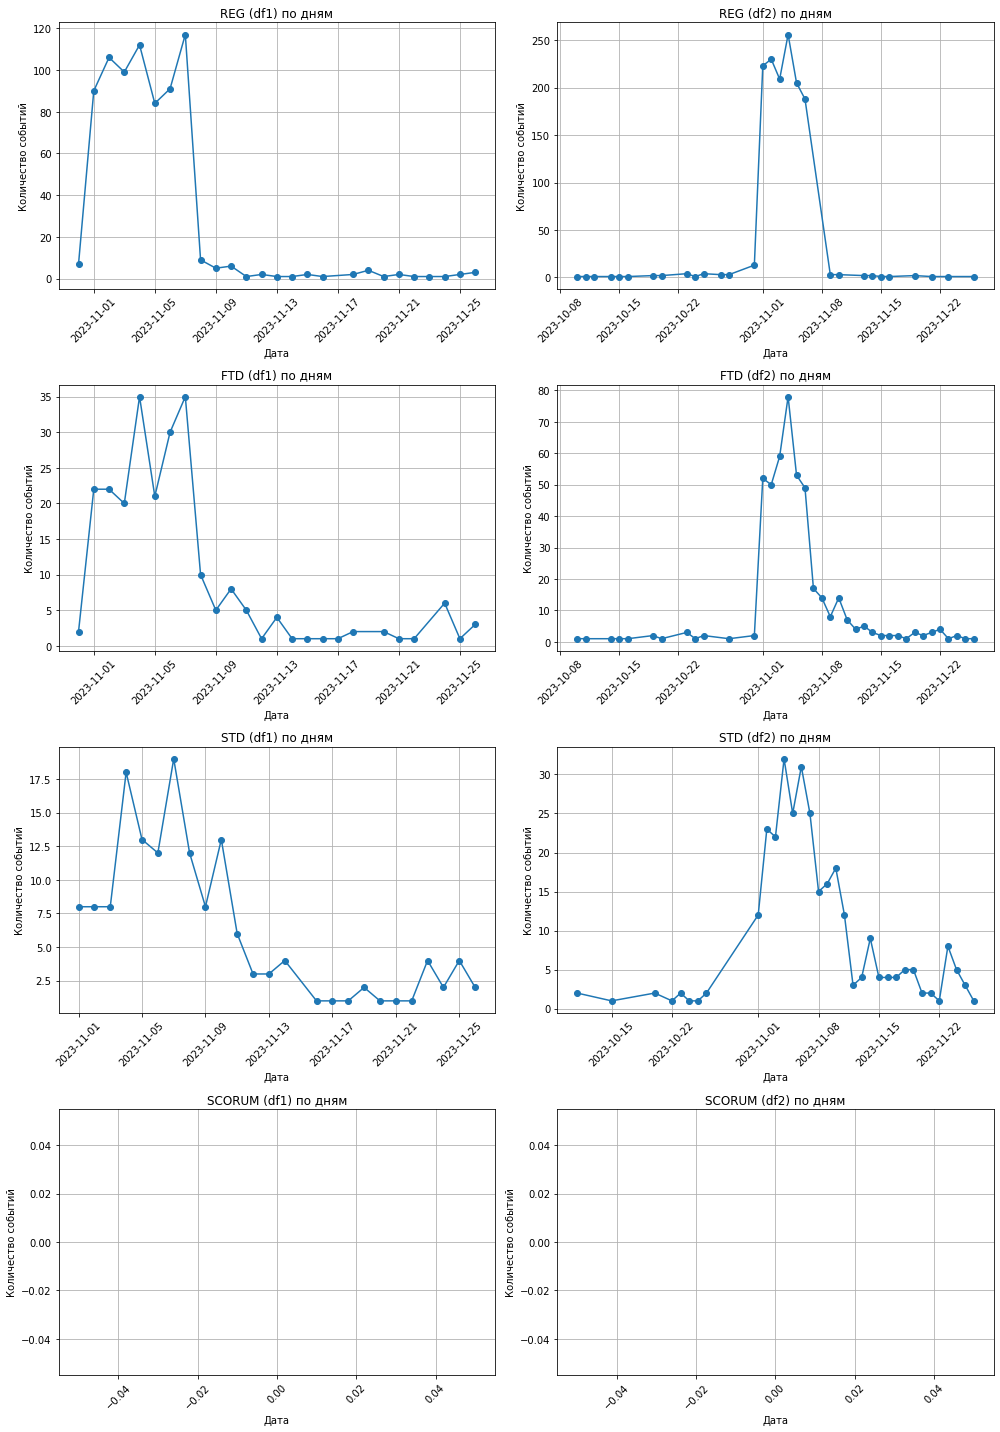

In [41]:
# Добавим колонку с датой для агрегации по дням
df1['event_date'] = df1['event_timestamp'].dt.date
df2['event_date'] = df2['event_timestamp'].dt.date

# Фильтруем данные по типам событий
event_names = ['reg', 'ftd', 'std', 'scorum']

# Создаем графики для каждой выборки
plt.figure(figsize=(14, 20))

for i, event in enumerate(event_names, 1):
    # График для df1
    plt.subplot(4, 2, 2*i - 1)
    event_data1 = df1[df1['event_name'] == event]
    event_count_by_day1 = event_data1.groupby('event_date').size()
    plt.plot(event_count_by_day1.index, event_count_by_day1.values, marker='o', label=f'{event} (df1)')
    plt.title(f'{event.upper()} (df1) по дням')
    plt.xlabel('Дата')
    plt.ylabel('Количество событий')
    plt.grid(True)
    plt.xticks(rotation=45)

    # График для df2
    plt.subplot(4, 2, 2*i)
    event_data2 = df2[df2['event_name'] == event]
    event_count_by_day2 = event_data2.groupby('event_date').size()
    plt.plot(event_count_by_day2.index, event_count_by_day2.values, marker='o', label=f'{event} (df2)')
    plt.title(f'{event.upper()} (df2) по дням')
    plt.xlabel('Дата')
    plt.ylabel('Количество событий')
    plt.grid(True)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()